<a href="https://colab.research.google.com/github/royal-dit/tensorflow-deeplearning/blob/main/Cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np 
import random
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_tests = train_test_split(datasets,test_size = 0.2,random_state=42)

In [3]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
#changing 2 dimensional array to one dimensional array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

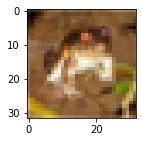

In [21]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

normalization

In [5]:
X_train= X_train/255
X_test = X_test/255
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000,))

**Normal Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000,activation='relu'),
    tf.keras.layers.Dense(3000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
    metrics = ['accuracy']
)
history =model.fit(X_train,y_train,epochs = 40)

** using CNN**

In [61]:
model = tf.keras.Sequential([
    #cnn
    tf.keras.layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.Conv2D(filters =128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 3200)            

In [66]:
history =model.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8110 - accuracy: 0.7129
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7587 - accuracy: 0.7352
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7095 - accuracy: 0.7518
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6651 - accuracy: 0.7643
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6270 - accuracy: 0.7793
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5869 - accuracy: 0.7937
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5557 - accuracy: 0.8047
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5159 - accuracy: 0.8185
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4889 - accuracy: 0.8271
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.461

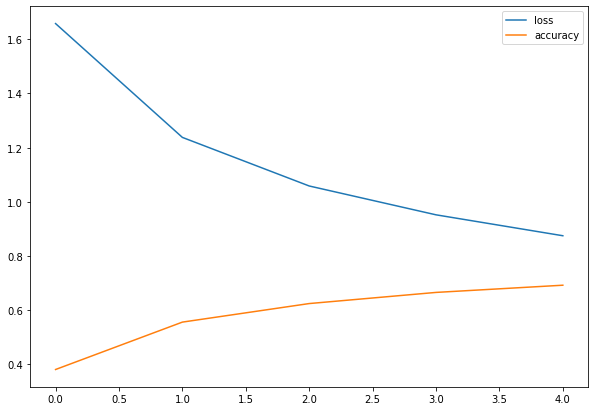

In [64]:
 pd.DataFrame(history.history).plot(figsize=(10,7))

In [67]:
model.evaluate(X_test,y_test)




313/313 [==============================] - 1s 3ms/step - loss: 1.4043 - accuracy: 0.6960


[1.4042539596557617, 0.6959999799728394]

In [50]:
y_test = y_test.reshape(-1,)
X_test.shape

(10000, 32, 32, 3)

In [38]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [39]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

**loading and prediciting image**

In [ ]:
!wget https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559__480.jpg

In [70]:
!wget https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg

--2022-10-22 17:14:52--  https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg
Resolving i.natgeofe.com (i.natgeofe.com)... 23.202.33.80, 23.202.33.74, 2600:1413:a000::17c8:dab2, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|23.202.33.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1155285 (1.1M) [image/jpeg]
Saving to: ‘NationalGeographic_2572187_square.jpg’

NationalGeographic_ 100%[===================>]   1.10M  --.-KB/s    in 0.06s   

2022-10-22 17:14:53 (19.7 MB/s) - ‘NationalGeographic_2572187_square.jpg’ saved [1155285/1155285]



In [42]:
#create a function to import and  image and resize it to be able to
def load_and_pred_image(filename,img_shape=32):
  #read in the image
  img = tf.io.read_file(filename)
  #decode the read file into tensor
  img=tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescale the image
  img=img/255.
  return img 

In [53]:
# dg = load_and_pred_image('/content/labrador-retriever-1210559__480.jpg')
# pred=model.predict(tf.expand_dims(dg,axis=0))
# pred.shape


In [68]:
def pred_and_plot(model,filename,class_names=classes):
  #import the target image
  img = load_and_pred_image(filename)
  #make a prediciton
  pred = model.predict(tf.expand_dims(img,axis=0))
  #adding logic for multiclass to mmake 1 array
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #plot the image and prdict class
  plt.imshow(img)
  plt.title(f"Prediciton:{pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 34ms/step


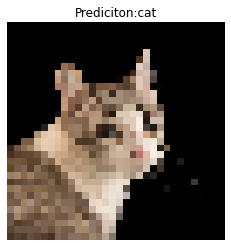

In [71]:
pred_and_plot(model,'/content/NationalGeographic_2572187_square.jpg')